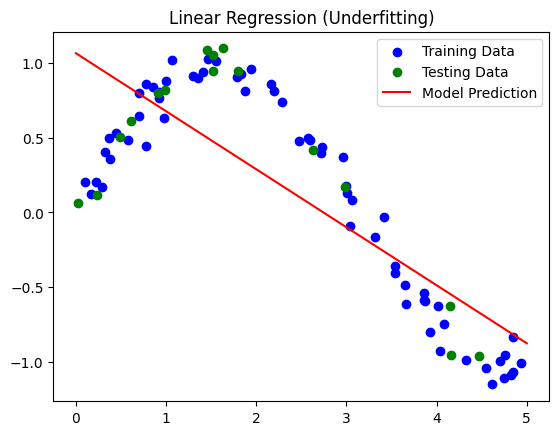

Linear Regression MSE: 0.2530273300524628


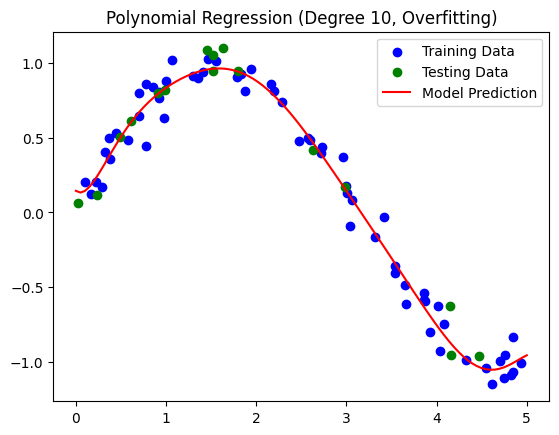

Polynomial Regression (Degree 10) MSE: 0.008482883656123898
Linear Regression Cross-Validation MSE: 0.48551925091434656
Polynomial Regression (Degree 10) Cross-Validation MSE: 284.53167537236425
Stratified K-Fold Logistic Regression Accuracy: 0.9733333333333334


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot results
def plot_results(X_train, y_train, X_test, y_test, model, title):
    plt.figure()
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Testing Data')
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    plt.plot(X_plot, model.predict(X_plot), color='red', label='Model Prediction')
    plt.title(title)
    plt.legend()
    plt.show()

# Linear Regression (Underfitting)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
plot_results(X_train, y_train, X_test, y_test, model_linear, "Linear Regression (Underfitting)")
print("Linear Regression MSE:", mean_squared_error(y_test, model_linear.predict(X_test)))

# Polynomial Regression (Overfitting)
degree = 10
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_train, y_train)
plot_results(X_train, y_train, X_test, y_test, model_poly, f"Polynomial Regression (Degree {degree}, Overfitting)")
print(f"Polynomial Regression (Degree {degree}) MSE:", mean_squared_error(y_test, model_poly.predict(X_test)))

# Cross-Validation
kf = KFold(n_splits=5)
cv_scores_linear = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation MSE:", -np.mean(cv_scores_linear))

cv_scores_poly = cross_val_score(make_pipeline(PolynomialFeatures(degree), LinearRegression()), X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Polynomial Regression (Degree {degree}) Cross-Validation MSE:", -np.mean(cv_scores_poly))

# Stratified K-Fold Cross-Validation (for classification example)
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
model_logistic = LogisticRegression(max_iter=200)

accuracy_scores = []
for train_index, test_index in skf.split(X_iris, y_iris):
    X_train_iris, X_test_iris = X_iris[train_index], X_iris[test_index]
    y_train_iris, y_test_iris = y_iris[train_index], y_iris[test_index]
    model_logistic.fit(X_train_iris, y_train_iris)
    y_pred_iris = model_logistic.predict(X_test_iris)
    accuracy_scores.append(accuracy_score(y_test_iris, y_pred_iris))

print("Stratified K-Fold Logistic Regression Accuracy:", np.mean(accuracy_scores))
